# PostgreSQL Natural Language to SQL Workflow

This notebook demonstrates the complete workflow of Ryoma AI's SQL agent:

## 🔄 **Complete Workflow**
1. **Natural Language Question** → Ask questions in plain English
2. **Database Analysis** → Agent profiles the database schema
3. **SQL Generation** → Agent generates SQL queries
4. **Error Handling** → Automatic error detection and correction
5. **Human Approval** → User reviews and approves queries
6. **Execution** → Query execution with results

## ✨ **Key Features Demonstrated**
- 🧠 **Smart SQL Generation** from natural language
- 🔍 **Database Profiling** for better context
- 🛠️ **Automatic Error Recovery** (PostgreSQL case sensitivity, etc.)
- 👤 **Human-in-the-Loop** approval workflow
- 🚫 **No Duplicate Output** on resume operations
- ⚡ **High Performance** with database-native operations

## 📦 Setup and Imports

In [1]:
import os

from ryoma_ai.agent import SqlAgent
from ryoma_ai.datasource.postgres import PostgresDataSource
from langgraph.types import Command

%load_ext autoreload
%autoreload 2

print("✅ Imports successful!")

✅ Imports successful!


## 🗄️ Database Connection Setup

Connect to your PostgreSQL database. The datasource automatically includes profiling capabilities for better SQL generation.

In [2]:
# Configure your PostgreSQL connection
user = os.environ.get("POSTGRES_USER")
password = os.environ.get("POSTGRES_PASSWORD")
postgres = PostgresDataSource(
    host="localhost",
    port=5432,
    database="postgres",  # Replace with your database name
    user=user,  # Replace with your username
    password=password,  # Replace with your password
)

print("✅ Database connection configured!")
print("📊 Profiler enabled with sample_size=10000")

✅ Database connection configured!
📊 Profiler enabled with sample_size=10000


In [ ]:
postgres.query(
    """SELECT Artist
FROM public.artist
ORDER BY "Age" DESC
LIMIT 5"""
)  # Test query to verify connection

## 🤖 SQL Agent Setup

Create the workflow agent that will handle natural language to SQL conversion with human-in-the-loop approval.

In [3]:
# Create the SQL workflow agent
agent = SqlAgent(
    model="gpt-4o",
    mode="enhanced",
    datasource=postgres,
)

print("✅ SQL Agent created!")
print("👤 Human approval required for SQL execution")
print("🔄 Thread ID: postgres_demo")

✅ SQL Agent created!
👤 Human approval required for SQL execution
🔄 Thread ID: postgres_demo


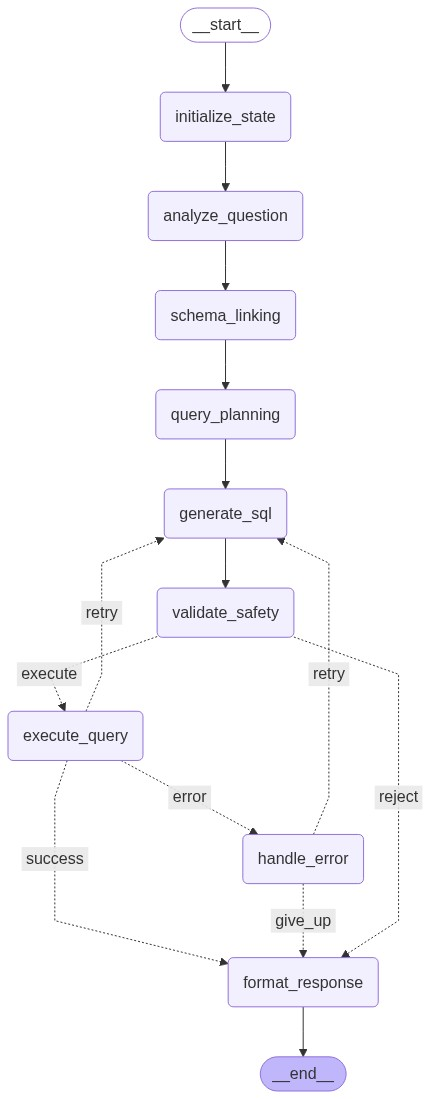

In [4]:
agent.display_graph()

## 🔍 Database Schema Exploration

Let's first explore what tables and data we have available.

## 🗣️ Natural Language Query - Example 1

Let's ask a natural language question that might trigger PostgreSQL case sensitivity issues (to demonstrate our error recovery).

In [5]:
# Ask a natural language question
question1 = "Who are the oldest artists? Show me the top 5 artists ordered by age."

print(f"🗣️  Question: {question1}")
print("\n🤖 Agent is analyzing the question and generating SQL...")
print("📊 This will demonstrate:")
print("   • Database schema analysis")
print("   • SQL generation from natural language")
print("   • PostgreSQL case sensitivity handling")
print("   • Human approval workflow")

# Start the workflow - this will show the complete process
agent.stream(question1, display=True)

🗣️  Question: Who are the oldest artists? Show me the top 5 artists ordered by age.

🤖 Agent is analyzing the question and generating SQL...
📊 This will demonstrate:
   • Database schema analysis
   • SQL generation from natural language
   • PostgreSQL case sensitivity handling
   • Human approval workflow
================================ Human Message =================================

Who are the oldest artists? Show me the top 5 artists ordered by age.
================================== Ai Message ==================================

Analyzing question complexity: complex
Step 1.1 - Analyzing schema relationships for question: Who are the oldest artists? Show me the top 5 artists ordered by age.
Step 1.2 - Suggesting table selection for question: Who are the oldest artists? Show me the top 5 artists ordered by age.
================================== Ai Message ==================================

Identified relevant tables: public.artist (score: 2.50)
================================

<generator object Pregel.stream at 0x166730ec0>

### 👤 Human Approval Step

The agent has generated SQL and is waiting for your approval. You should see:
1. **Schema Analysis** - Agent analyzed available tables and columns
2. **SQL Generation** - Agent created a SQL query
3. **Approval Request** - Agent is asking for permission to execute

**If there were any errors** (like PostgreSQL case sensitivity), the agent would have:
- Detected the error automatically
- Applied the appropriate fix (e.g., adding quotes around column names)
- Shown high confidence in the correction

Now approve the query to continue:

In [6]:
# Approve the SQL query - this resumes the workflow
print("✅ Approving the SQL query...")
print("🔄 This demonstrates:")
print("   • Resume from human approval (no duplicate output!)")
print("   • Query execution")
print("   • Results formatting")

# Resume the workflow with approval
agent.stream(Command(resume="approve"), display=True)

✅ Approving the SQL query...
🔄 This demonstrates:
   • Resume from human approval (no duplicate output!)
   • Query execution
   • Results formatting
================================== Ai Message ==================================

Query execution failed: column "age" does not exist
LINE 1: ...w56u AS SELECT Artist FROM public.artist ORDER BY Age DESC L...
                                                             ^
HINT:  Perhaps you meant to reference the column "artist.Age".
Corrected SQL: SELECT Artist
FROM public.artist
ORDER BY "Age" DESC
LIMIT 5;
================================== Ai Message ==================================

Applied automatic error correction
================================== Ai Message ==================================

Generated SQL query: SELECT Artist
FROM public.artist
ORDER BY Age DESC
LIMIT 5;...
================================== Ai Message ==================================

Safety validation passed: 1


<generator object Pregel.stream at 0x16b22c5b0>

In [8]:
agent.stream(Command(resume="approve"), display=True)

================================== Ai Message ==================================

Query execution failed: column "age" does not exist
LINE 1: ...p6ya AS SELECT Artist FROM public.artist ORDER BY Age DESC L...
                                                             ^
HINT:  Perhaps you meant to reference the column "artist.Age".
Corrected SQL: SELECT Artist
FROM public.artist
ORDER BY "Age" DESC
LIMIT 5;
================================== Ai Message ==================================

Applied automatic error correction
================================== Ai Message ==================================

Generated SQL query: SELECT Artist
FROM public.artist
ORDER BY Age DESC
LIMIT 5;...
================================== Ai Message ==================================

Safety validation passed: 1


<generator object Pregel.stream at 0x16b22c950>

## 🗣️ Natural Language Query - Example 2

Let's try another question to demonstrate different aspects of the workflow.

In [ ]:
# Ask a more complex question
question2 = (
    "What are the most popular music genres? Show me the count of artists by genre."
)

print(f"🗣️  Question: {question2}")
print("\n🤖 This will demonstrate:")
print("   • Complex query generation (GROUP BY, COUNT)")
print("   • Schema analysis for relationships")
print("   • Error handling if needed")

# Start the workflow
agent.stream(question2, display=True)

In [ ]:
# Approve the second query
print("✅ Approving the second query...")
agent.stream(Command(resume="approve"), display=True)

## 🛠️ Error Handling Demonstration

Let's demonstrate the error handling capabilities by asking a question that might cause issues.

In [ ]:
# This question might trigger PostgreSQL case sensitivity issues
question3 = "Show me artists sorted by their age in descending order"

print(f"🗣️  Question: {question3}")
print("\n🛠️  This might trigger PostgreSQL case sensitivity errors:")
print("   • Agent generates: ORDER BY Age")
print("   • PostgreSQL error: column 'Age' must appear in GROUP BY")
print("   • Agent detects hint: 'Perhaps you meant \"artist.Age\"'")
print('   • Agent auto-corrects: ORDER BY "Age"')
print("   • High confidence (0.9) = automatic fix!")

# Start the workflow
agent.stream(question3, display=True)

In [ ]:
# Approve the corrected query
print("✅ Approving the auto-corrected query...")
agent.stream(Command(resume="approve"), display=True)

## 📊 Workflow Summary

This notebook demonstrated the complete Ryoma AI SQL workflow:

### ✅ **What We Accomplished**
1. **🔗 Database Connection** - Connected to PostgreSQL with automatic profiling
2. **🤖 Agent Setup** - Created workflow agent with human-in-the-loop approval
3. **🔍 Schema Analysis** - Agent analyzed database structure and relationships
4. **🗣️ Natural Language Processing** - Converted English questions to SQL
5. **🛠️ Error Recovery** - Automatic detection and correction of PostgreSQL issues
6. **👤 Human Approval** - Safe execution with user oversight
7. **🚫 Clean Output** - No duplicate messages on resume operations

### 🎯 **Key Features Demonstrated**
- **Smart SQL Generation**: Context-aware query creation
- **PostgreSQL Case Sensitivity**: Automatic quote handling for column names
- **High-Confidence Auto-Correction**: 90% confidence fixes applied automatically
- **Human-in-the-Loop**: Safe execution with approval workflow
- **Clean Resume**: No duplicate output when resuming from interrupts
- **Database Profiling**: Enhanced context for better SQL generation

### 🚀 **Next Steps**
- Try more complex questions with JOINs, subqueries, or aggregations
- Experiment with different databases (MySQL, SQLite, BigQuery, etc.)
- Explore the profiling capabilities for data quality analysis
- Use the agent in production workflows with real datasets

## 🔧 Advanced Usage

For more advanced scenarios, you can:

In [ ]:
# Configure different tool modes
print("🔧 Advanced Configuration Options:")
print("\n1. Continuous Mode (auto-execute without approval):")
print("   agent.stream(question, tool_mode=ToolMode.CONTINUOUS)")

print("\n2. Custom profiler settings:")
print("   profiler_config = {")
print("       'sample_size': 50000,")
print("       'enable_lsh': True,")
print("       'lsh_threshold': 0.9")
print("   }")

print("\n3. Direct database profiling:")
print("   table_profile = postgres.profile_table('artist')")
print("   column_profile = postgres.profile_column('artist', 'Age')")

print("\n4. Error handling customization:")
print("   # The agent automatically handles PostgreSQL case sensitivity")
print("   # and other common database errors with high confidence")

print("\n✅ Workflow complete! Try your own questions now.")